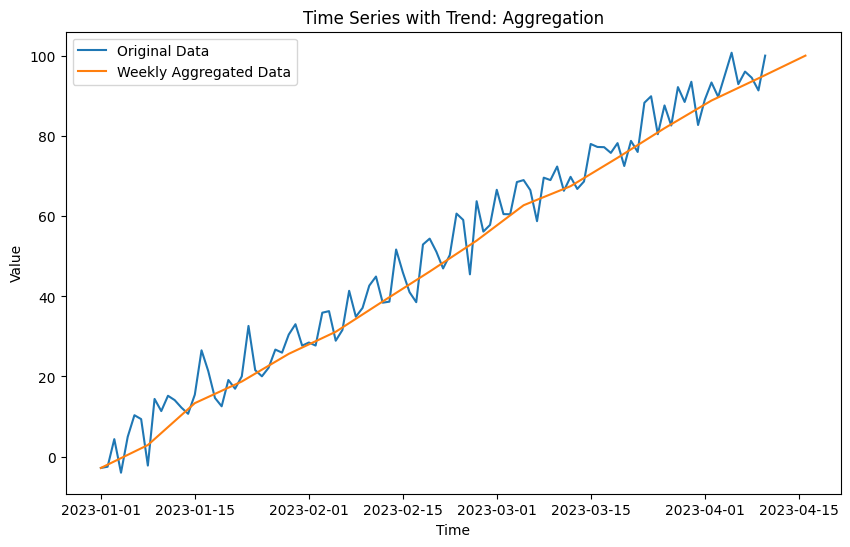

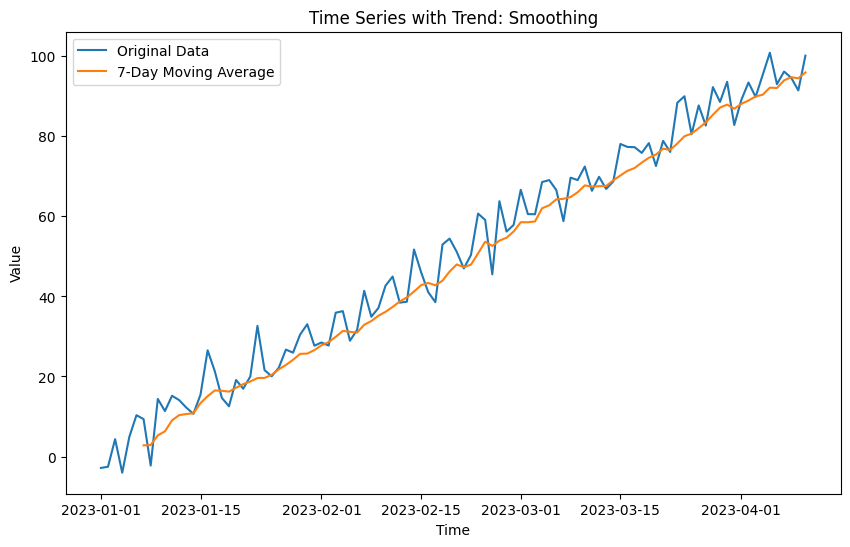

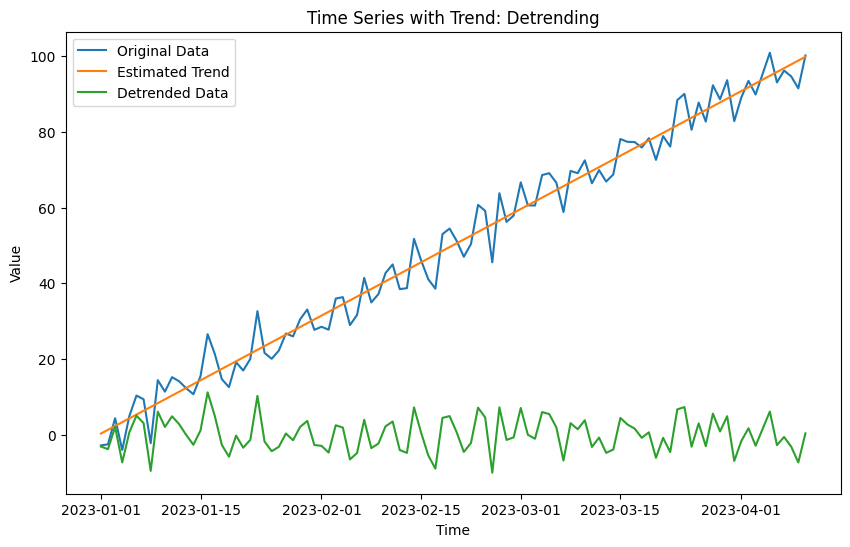

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample time series data with trend
time_series = np.arange(1, 101) + np.random.normal(0, 5, 100)

# 1. Aggregation (Resampling)
#   - Reduce the frequency of data points and average the values within each interval.
#   - This can help in reducing the impact of short-term fluctuations and highlighting the trend.

# Resample the data to a weekly frequency
df = pd.DataFrame({'value': time_series})
df.index = pd.date_range(start='2023-01-01', periods=100, freq='D')
weekly_data = df.resample('W').mean()

# Plot original and aggregated data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(weekly_data.index, weekly_data['value'], label='Weekly Aggregated Data')
plt.title('Time Series with Trend: Aggregation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# 2. Smoothing (Moving Average)
#   - Calculate the average of a fixed number of consecutive data points (window size).
#   - This can help in smoothing out short-term fluctuations and revealing the underlying trend.

# Calculate a 7-day moving average
window_size = 7
moving_average = df['value'].rolling(window=window_size).mean()

# Plot original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(df.index, moving_average, label='7-Day Moving Average')
plt.title('Time Series with Trend: Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# 3. Eliminating Trend (Detrending)
#   - Remove the trend component from the time series to analyze the remaining fluctuations.
#   - Linear regression can be used to fit a line to the data and then subtract this trend from the original data.

# Linear regression to estimate the trend
x = np.arange(len(time_series))
y = time_series
coefficients = np.polyfit(x, y, 1)  # Fit a linear line
trend_line = np.polyval(coefficients, x)

# Detrend the data
detrended_data = time_series - trend_line

# Plot original, trend, and detrended data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(df.index, trend_line, label='Estimated Trend')
plt.plot(df.index, detrended_data, label='Detrended Data')
plt.title('Time Series with Trend: Detrending')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()